# SLM PROJECT - BANK MARKETING
### Warsaw School of Economics
### Jakub Kostrzębski 73070

# 0) Importing required modules

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as scp

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# 1) Introduction, problem/task description, features explanation, dataset description

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification task is to predict if the client will subscribe to a term deposit (variable y). Since marketing campaigns were based on phone calls, often more than one call to the same client was required in order to access if the product (bank term deposit subscription) would be yes or no.

This dataset has been donated in 2012, has 41188 observations and 21 variables. There is no missing data.

### Bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

### Data related to contact:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign (numeric, includes last contact)
13. pdays: number of days since last contact (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic attributes
16. emp.var.rate: employment variation rate - quarterly (numeric)
17. cons.price.idx: consumer price index - monthly (numeric)
18. cons.conf.idx: consumer confidence index - monthly (numeric)
19. euribor3m: euribor 3 month rate - daily (numeric)
20. nr.employed: number of employees - quarterly (numeric)

### Target variable
21. y: has the client subscribed to a term deposit? (binary: 'yes','no')

#### Source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

# 2) Cleaning, preprocessing data, EDA

## a) Loading the dataset

In [4]:
MAIN_PATH = '.../Statistical Learning Methods/Project/Bank-additional-full.csv'
df = pd.read_csv(MAIN_PATH, sep = ';')
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
7617,43,technician,married,professional.course,no,no,no,telephone,may,fri,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
12630,30,blue-collar,single,basic.9y,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
35675,31,blue-collar,single,basic.9y,no,yes,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.244,5099.1,no
18225,29,technician,married,university.degree,no,yes,no,cellular,jul,wed,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
30777,28,blue-collar,single,basic.9y,unknown,no,no,cellular,may,tue,...,1,999,1,failure,-1.8,92.893,-46.2,1.344,5099.1,no
11664,44,technician,single,basic.6y,unknown,no,no,telephone,jun,fri,...,9,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
9255,51,admin.,married,high.school,no,no,no,telephone,jun,fri,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
34544,27,admin.,married,professional.course,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
24544,34,admin.,married,high.school,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
24169,41,admin.,married,high.school,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## b) Checking data types of variables and dropping variable - _duration_ (as asked in the data description)

In [5]:
df=df.drop('duration', axis=1)
df.info()
# Everything seems fine.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

## c) Checking for null values

In [6]:
df.isnull().any()
# None found

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

## d) Exploring categorical features

In [7]:
categorical_data = df.select_dtypes(exclude = np.number)
categorical_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


### Barcharts

In [8]:
c_list = list(categorical_data.columns)

def pltCat(list, target):
    
    fig, axis = plt.subplots(len(list) ,1 , figsize=(20, 75))  

    for i in range(len(list)):
        #plot
        ax = sb.countplot(x=list[i], data=df, hue=target, ax=axis[i])
        ax.set_title(list[i])  
        ax.set_xlabel('')
        
        #legend
        ax.legend(title='Subscribed?',
                      loc='upper right',
                      labels=['No', 'Yes'])
  
        #label skew for visibility
        if list[i] in ['job', 'education']:
          for item in ax.get_xticklabels():
            item.set_rotation(15)
        
        # % marks
        for a in ax.patches:
          height = a.get_height()
          ax.text(a.get_x()+a.get_width()/2,
                  height + 25,
                  '{0}%'.format(round(height/len(df)*100,2)),
                  ha="center")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


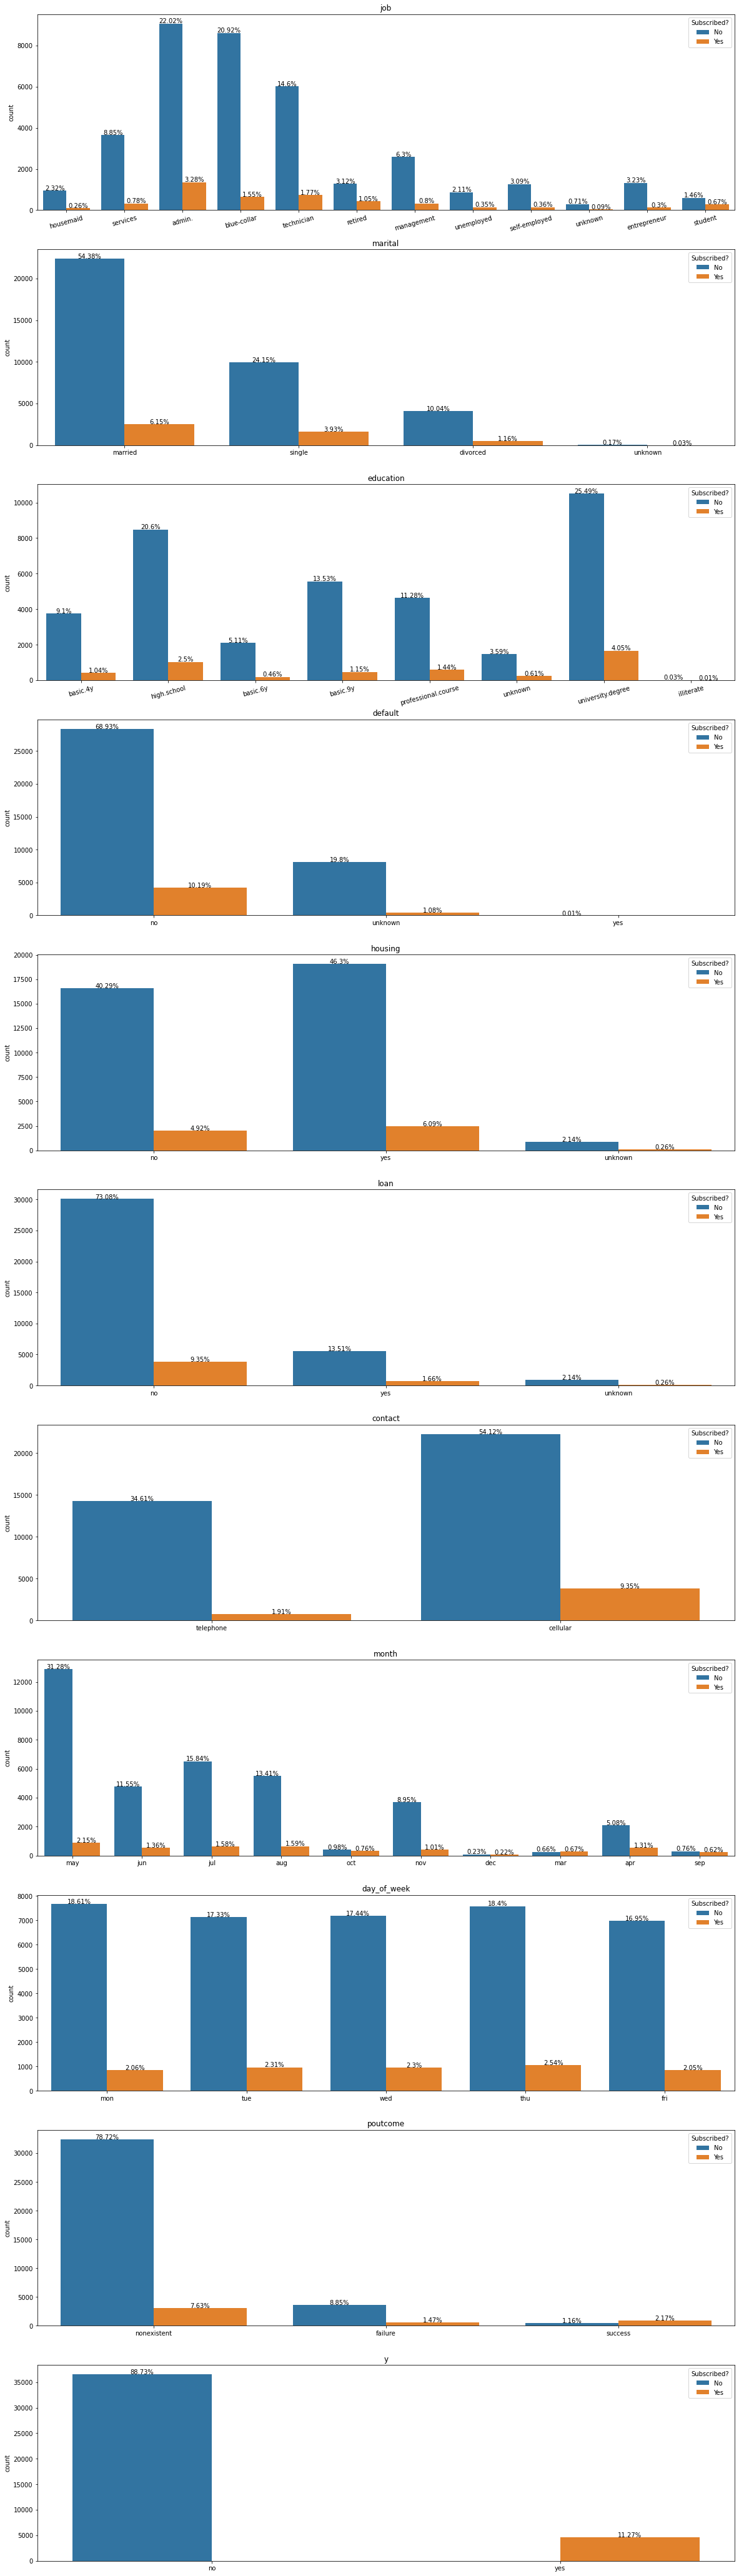

In [9]:
pltCat(c_list, 'y')

### Observations

* We can see that the dataset is not equally distributed according to target Y. Most observations in all categorical variables are of people who didn't subscribe.
* There is only 1 single category in which there are more subscribers than non-subscribers, it is in month - march (0,66% vs 0,67%). It appears the marketing campaign had more success then.
* Overall there is only 11% subscribers in the entire dataset.


## e) Exploring numerical features

In [10]:
numeric_data = df.select_dtypes(include = np.number)
numeric_data.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### Distribution plots

In [11]:
n_list = list(numeric_data.columns)


def plotDist(list):
  
    fig, ax = plt.subplots(len(list), 1,figsize=(15, 50))
    
    for i in range(len(list)):
            sb.distplot(df.loc[:, list[i]],
                         hist=True,
                         kde=True,
                         color='red',
                         ax=ax[i]).set_xlabel('')
            ax[i].set_title(list[i])

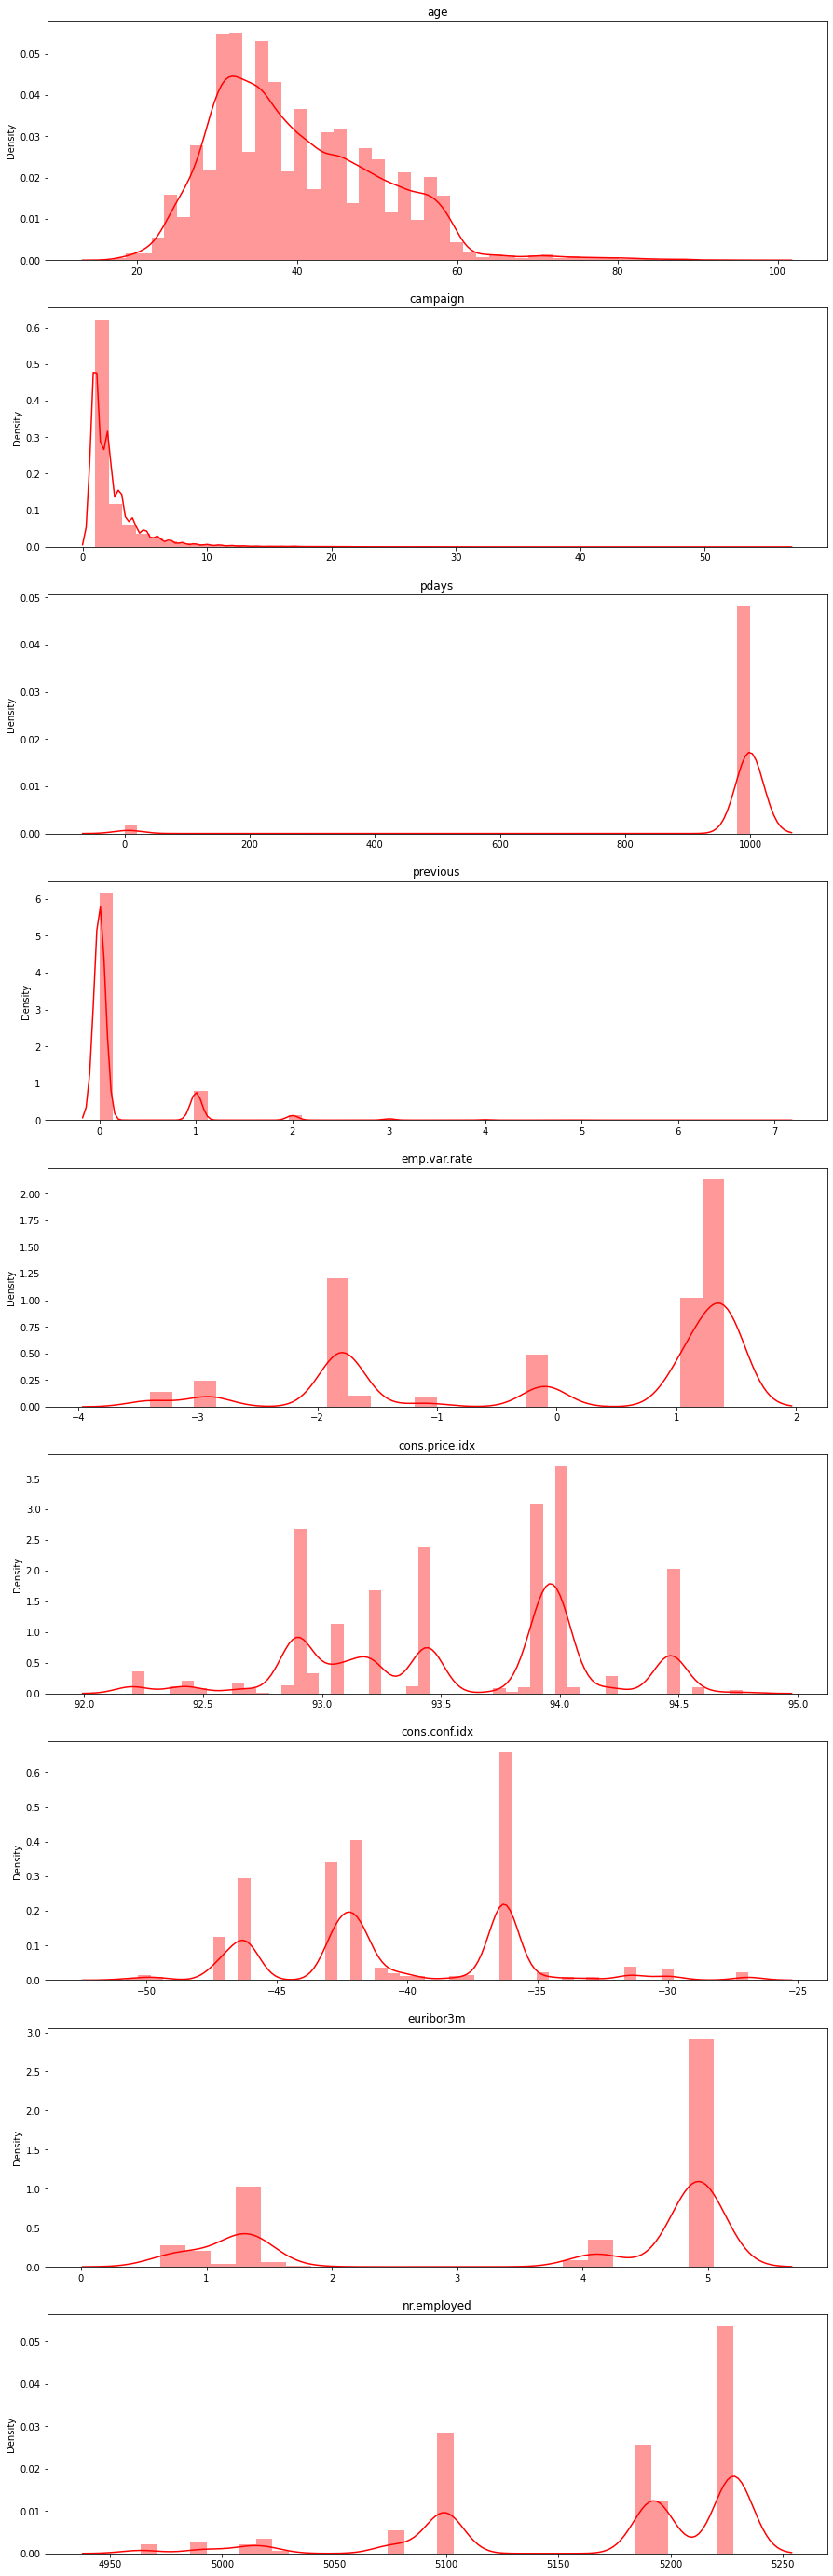

In [12]:
plotDist(n_list)

### Descriptive statistics

In [13]:
for i in range(len(n_list)):
    #Quartiles
    print(n_list[i].upper())
    print('1st Quartile: ', df[n_list[i]].quantile(q = 0.25))
    print('2nd Quartile: ', df[n_list[i]].quantile(q = 0.50))
    print('3rd Quartile: ', df[n_list[i]].quantile(q = 0.75))
    print('4th Quartile: ', df[n_list[i]].quantile(q = 1.00))
    
    #Outlier calculation:
      # Interquartile range, IQR = Q3 - Q1
      # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
      # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
        
    IQR = df[n_list[i]].quantile(q = 0.75) - df[n_list[i]].quantile(q = 0.25)
    Omin = df[n_list[i]].quantile(q = 0.25) - 1.5 * IQR
    Omax = df[n_list[i]].quantile(q = 0.75) + 1.5 * IQR
    
    print('For ' + n_list[i] + ' values below ' + str(round(Omin, 3)) + ' and above ' + str(round(Omax, 3)) + ' are outliers.')
    
    ON = df[df[n_list[i]] < Omin][n_list[i]].count() + df[df[n_list[i]] > Omax][n_list[i]].count()
    print('Number of outliers: {0} ({1}%).'.format(ON, round(ON/len(df), 2)))
    
    print('MEAN:', round(df[n_list[i]].mean(), 2))
    print('STD:', round(df[n_list[i]].std(), 2))
    print('MIN:', round(df[n_list[i]].min(), 2))
    print('MAX:', round(df[n_list[i]].max(), 2), '\n')
    print

AGE
1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
For age values below 9.5 and above 69.5 are outliers.
Number of outliers: 469 (0.01%).
MEAN: 40.02
STD: 10.42
MIN: 17
MAX: 98 

CAMPAIGN
1st Quartile:  1.0
2nd Quartile:  2.0
3rd Quartile:  3.0
4th Quartile:  56.0
For campaign values below -2.0 and above 6.0 are outliers.
Number of outliers: 2406 (0.06%).
MEAN: 2.57
STD: 2.77
MIN: 1
MAX: 56 

PDAYS
1st Quartile:  999.0
2nd Quartile:  999.0
3rd Quartile:  999.0
4th Quartile:  999.0
For pdays values below 999.0 and above 999.0 are outliers.
Number of outliers: 1515 (0.04%).
MEAN: 962.48
STD: 186.91
MIN: 0
MAX: 999 

PREVIOUS
1st Quartile:  0.0
2nd Quartile:  0.0
3rd Quartile:  0.0
4th Quartile:  7.0
For previous values below 0.0 and above 0.0 are outliers.
Number of outliers: 5625 (0.14%).
MEAN: 0.17
STD: 0.49
MIN: 0
MAX: 7 

EMP.VAR.RATE
1st Quartile:  -1.8
2nd Quartile:  1.1
3rd Quartile:  1.4
4th Quartile:  1.4
For emp.var.rate values below -6.6 and ab

### f) Recoding the target and pdays to binary

In [14]:
df.y = df.y.replace({'yes':1,'no':0})
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [15]:
df.loc[df['pdays'] == 999, 'pdays'] = 0
df.loc[df['pdays'] != (999 and 0), 'pdays'] = 1
df.pdays.value_counts()

0    39688
1     1500
Name: pdays, dtype: int64

### g) Heatmap
Only values that have p < 0,05 on pearsons correlation test are displayed.

In [16]:
dfn = df.select_dtypes(include='number')
dfn.head(10)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
5,45,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
8,24,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0
9,25,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [17]:
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = scp.stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

p_values = corr_sig(dfn)
mask = np.invert(np.tril(p_values<0.05))

In [18]:
def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sb.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})

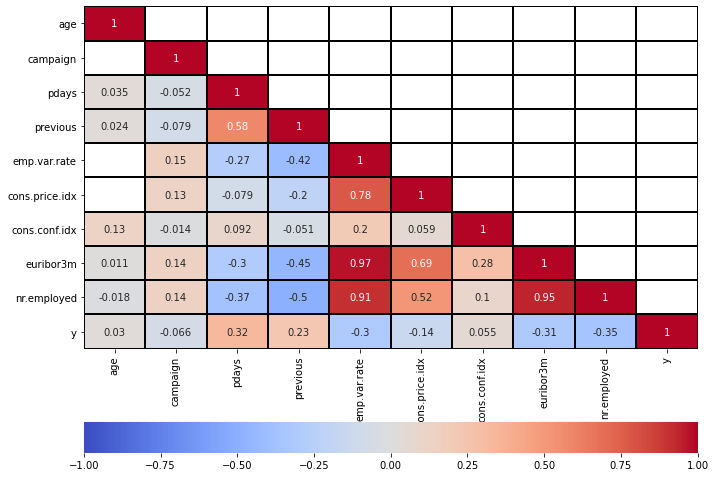

In [19]:
corr = dfn.corr()                            # get correlation
p_values = corr_sig(dfn)                     # get p-Value
mask = np.invert(np.tril(p_values<0.05))     # mask - only get significant corr
plot_cor_matrix(corr,mask)  

### Observations
* There are almost no outliers, at least not enought to cause any problems (Highest 0.14%, second highest 0.06%)
* age - nothing special, slight positive skew, ppl of all ages included, ranging from 17 to 98
* campaign - almost all values are between 0 and 5, but someone was apparently contacted 56 times
* pdays -  if there was no contact, value is automatically set to 999. Almost all values are 999 (~96%). I have decided to recode this variable into binary: was this client contacted in the past campaign or not?
*  As for the correlation there is nothing highly correlated with the target variable Y (I suspect that duration variable could have been highly correlated, if any). There is some correlation between:
  * previous and pdays (0.58 - moderate, number of times contacted in last campaign and number of days since contact from last campaign)
  * emp.var.rate and previous (-0.42 - moderate, employment variation rate and number of times contacted in last campaign)
  * cons.price.idx and emp.var.rate (0.78 - high, consumer price index and employment variation rate)
  * euribor3m and previous (-0.45 - moderate, euribor 3 month rate and number of times contacted in last campaign)
  * euribor3m and emp.var.rate (0.97 - very high, euribor 3 month rate and employment variation rate)
  * euribor3m and cons.price.idx (0.69 - high, euribor 3 month rate and consumer price index)
  * nr.employed and previous (-0.5 - moderate, number of employees and number of times contacted in last campaign)
  * nr.employed and emp.var.rate (0.91 - very high, number of employees and employment variation rate)
  * nr.employes and cons.price.idx ( 0.52 - moderate, number of employees and consumer price index)
  * nr.employes and euribor3m (0.95 - very high, number of employees and euribor 3 month rate)
  * y and pdays (0.32 - moderate, target variable subscription and number of days since contact from last campaign)
  * y and emp.var.rate (-0.3 - moderate, target variable subscription and employment variation rate)
  * y and euribor3m (-0.31 - moderate, target variable subscription and euribor 3 month rate)
  * y and nr.employed (-0.35 - moderate, target variable subscription and number of employees)
  
 I suppose that social and economic attributes are correlated with each due to how economy and it's cycles work.

### h) Recoding categorical features into dummy variables

In [20]:
# y is already recoded
c_list.remove('y')

df = pd.get_dummies(df, columns=c_list, drop_first = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  int64  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

## 4) Modeling


### a) Creating training and testing samples
* Training set will have 80% of observations while testing set will have 20%.
* Seed 111 will be used for reproducibility.
* After obtaining a balanced data set, accuracy should be a good model measure and will be used to compare models.

In [21]:
# Creating dataset X with all features and dataset Y with target variable
X = df.loc[ : , df.columns != 'y']
Y = df[['y']]
print(X.shape, Y.shape)
print(Y['y'].value_counts())

(41188, 52) (41188, 1)
0    36548
1     4640
Name: y, dtype: int64


In [22]:
# Creating training and test samples
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 111)
print('X_train ', X_train.shape, '\nY_train ', Y_train.shape, '\nX_test ', X_test.shape, '\nY_test ', Y_test.shape)

X_train  (32950, 52) 
Y_train  (32950, 1) 
X_test  (8238, 52) 
Y_test  (8238, 1)


### b) Resampling the training data
* Most algorithms work better with balanced data.
* We know that from our target variable only ~11% of observations are successful subscriptions.
* Undersampling will be used to balance the training set.

In [23]:
under = RandomUnderSampler(sampling_strategy=1, random_state=111)
X_train3, Y_train3 = under.fit_resample(X_train, Y_train)

print(X_train3.shape, Y_train3.shape)
print(Y_train['y'].value_counts())
print(Y_train3['y'].value_counts())

(7394, 52) (7394, 1)
0    29253
1     3697
Name: y, dtype: int64
1    3697
0    3697
Name: y, dtype: int64


### c) Logistic Regression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train3,Y_train3)
log_pred = logmodel.predict(X_test)

matrix = confusion_matrix(Y_test, log_pred)
print(matrix)
print("Accuracy of the model: ", round(accuracy_score(Y_test, log_pred),3))
print("Recall of the model: ", round(recall_score(Y_test, log_pred),3), "\n")

print(classification_report(Y_test, log_pred))
LOG_score = round((cross_val_score(logmodel, Y_test, log_pred, cv=10, scoring = 'accuracy')).mean(), 3)
print("Mean of the cross-validation accuracy: ", LOG_score)

[[6047 1248]
 [ 327  616]]
Accuracy of the model:  0.809
Recall of the model:  0.653 

              precision    recall  f1-score   support

           0       0.95      0.83      0.88      7295
           1       0.33      0.65      0.44       943

    accuracy                           0.81      8238
   macro avg       0.64      0.74      0.66      8238
weighted avg       0.88      0.81      0.83      8238

Mean of the cross-validation accuracy:  0.809


### d) K-Nearest Neighbours

k=1 61.44 (+/- 1.56)
k=2 63.43 (+/- 18.78)
k=3 65.01 (+/- 2.12)
k=4 66.53 (+/- 11.38)
k=5 65.96 (+/- 2.08)
k=6 67.43 (+/- 8.85)
k=7 66.21 (+/- 2.90)
k=8 67.70 (+/- 8.72)
k=9 66.90 (+/- 3.96)
k=10 68.37 (+/- 8.48)
k=11 67.13 (+/- 4.21)
k=12 68.59 (+/- 8.01)
k=13 67.66 (+/- 4.79)
k=14 68.83 (+/- 8.28)
k=15 68.24 (+/- 5.68)
k=16 69.20 (+/- 8.52)
k=17 68.11 (+/- 6.14)
k=18 69.01 (+/- 8.57)
k=19 68.51 (+/- 6.40)
k=20 69.25 (+/- 8.82)
k=21 68.59 (+/- 6.77)
k=22 69.44 (+/- 9.04)
k=23 68.50 (+/- 6.98)
k=24 69.19 (+/- 8.78)
k=25 68.19 (+/- 7.07)
The optimal number of neighbors is 21 with 69.4%


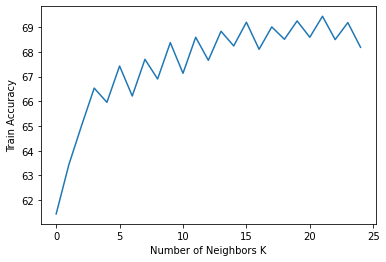

In [37]:
neighbors = np.arange(0,25)

cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn, X_train3, Y_train3, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [38]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train3,Y_train3)
knn_pred = knn.predict(X_test)

matrix = confusion_matrix(Y_test, knn_pred)
print(matrix)
print("Accuracy of the model: ", round(accuracy_score(Y_test, knn_pred),3))
print("Recall of the model: ", round(recall_score(Y_test, knn_pred),3), "\n")

print(classification_report(Y_test, knn_pred))
knn_score = round((cross_val_score(knn, Y_test, knn_pred, cv=10, scoring = 'accuracy')).mean(), 3)
print("Mean of the cross-validation accuracy: ", knn_score)

[[5808 1487]
 [ 304  639]]
Accuracy of the model:  0.783
Recall of the model:  0.678 

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7295
           1       0.30      0.68      0.42       943

    accuracy                           0.78      8238
   macro avg       0.63      0.74      0.64      8238
weighted avg       0.88      0.78      0.81      8238

Mean of the cross-validation accuracy:  0.783


### e) Decision Tree

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train3,Y_train3)
dt_pred = dt.predict(X_test)

matrix = confusion_matrix(Y_test, dt_pred)
print(matrix)
print("Accuracy of the model: ", round(accuracy_score(Y_test, dt_pred),3))
print("Recall of the model: ", round(recall_score(Y_test, dt_pred),3), "\n")

print(classification_report(Y_test, dt_pred))
dt_score = round((cross_val_score(dt, Y_test, dt_pred, cv=10, scoring = 'accuracy')).mean(), 3)
print("Mean of the cross-validation accuracy: ", dt_score)

[[4750 2545]
 [ 332  611]]
Accuracy of the model:  0.651
Recall of the model:  0.648 

              precision    recall  f1-score   support

           0       0.93      0.65      0.77      7295
           1       0.19      0.65      0.30       943

    accuracy                           0.65      8238
   macro avg       0.56      0.65      0.53      8238
weighted avg       0.85      0.65      0.71      8238

Mean of the cross-validation accuracy:  0.651


### e) Random Forest

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train3,Y_train3)
rf_pred = rf.predict(X_test)

matrix = confusion_matrix(Y_test, rf_pred)
print(matrix)
print("Accuracy of the model: ", round(accuracy_score(Y_test, rf_pred),3))
print("Recall of the model: ", round(recall_score(Y_test, rf_pred),3), "\n")

print(classification_report(Y_test, rf_pred))
rf_score = round((cross_val_score(logmodel, Y_test, rf_pred, cv=10, scoring = 'accuracy')).mean(), 3)
print("Mean of the cross-validation accuracy: ", rf_score)

[[5819 1476]
 [ 312  631]]
Accuracy of the model:  0.783
Recall of the model:  0.669 

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      7295
           1       0.30      0.67      0.41       943

    accuracy                           0.78      8238
   macro avg       0.62      0.73      0.64      8238
weighted avg       0.87      0.78      0.81      8238

Mean of the cross-validation accuracy:  0.783


### f) Model comparison

In [30]:
print("Accuracy of Logistic Regression", LOG_score)
print("Accuracy of KNN", knn_score)
print("Accuracy of Decision Tree", dt_score)
print("Accuracy of Random Forest", rf_score)

Accuracy of Logistic Regression 0.809
Accuracy of KNN 0.715
Accuracy of Decision Tree 0.651
Accuracy of Random Forest 0.783


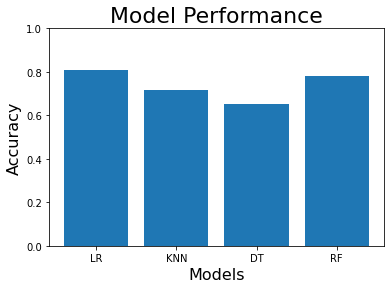

In [31]:
plt.bar(x=["LR","KNN","DT","RF"],height=[LOG_score, knn_score, dt_score, rf_score])
plt.title( "Model Performance",fontsize = 22)
plt.xlabel("Models",fontsize = 16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim(0,1)
plt.show()

* Looks like Logistic Regression was the best model at 81% accuracy.
* The worst model turned out to be the decision tree with just 65% accuracy.

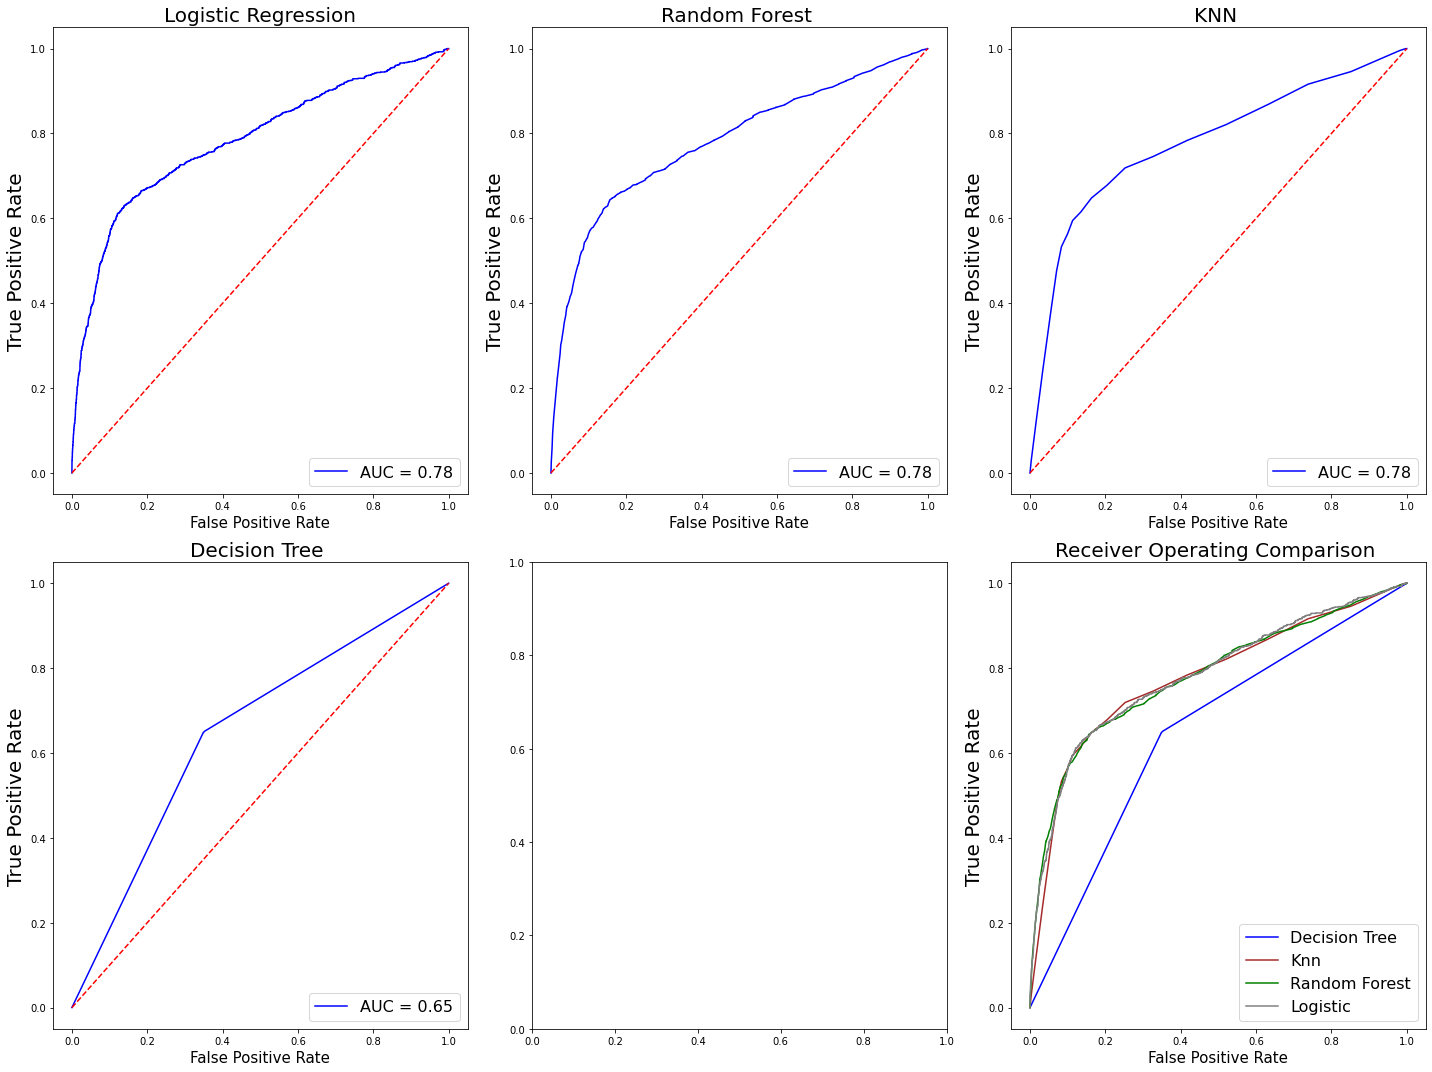

In [51]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(Y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Logistic Regression',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(Y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Random Forest ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(Y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE
probs = dt.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(Y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

## 5) Summary
* Main goal of this task was to create a model that best identifies and classifies customers that will subscribe to a term deposit. For this, after explanatory data analysis and some minor recoding, we built 4 models. Out of them logistic regression showed the greatest performance with accuracy of 81%.

* Biggest problem of this project has definitely been dealing with an imbalanced dataset. Even though I've applied undersampling I am left to wonder if oversampling, mix of both or maybe just leaving the set as it was would yield me better results. I do hope that undersampling helped me avoid problems such as overfitting, as my results were very similar when checked with cross-validaiton.

* Another problem would be finding hyperparameters to tune. I believe that for now I lack insight to grasp them correctly.